<h1><b>Nama  : Muhammad Bastian Hanafi</b></h1>
<h1><b>Kelas : 20 IF 07</b></h1>
<h1><b>NIM   : 20.11.3714</b></h1>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# read csv 
df = pd.read_csv("/content/drive/MyDrive/kuliah/Smester 5/big data & data mining/p9/StudentPerformance-encoded.csv")

In [ ]:
#see data
df.head()

,Unnamed: 0,jenis_kelamin,umur,konsentrasi,asal,kos,uang_saku,paket_data,kendaraan,laptop,...,jumlah_org,score_toefl,jumlah_lomba,keadaan_ortu_divorced,romance,ukuran_sepatu,tinggi_badan,berat_badan,ipk,lulus_tepatwaktu
0,0,0,20,2,12,0,200000,50000,1,1,...,2,119,0,0,1,41,165,62.5,3.86,1
1,1,1,19,0,3,1,500000,70000,0,1,...,2,117,4,0,0,38,141,57.9,3.96,1
2,2,0,22,1,12,0,300000,100000,1,1,...,1,90,2,0,1,42,151,59.8,3.68,0
3,3,0,20,0,12,0,700000,100000,2,1,...,1,97,0,0,1,41,140,57.8,3.69,0
4,4,0,21,1,11,1,800000,80000,0,1,...,1,114,0,0,1,40,165,62.5,3.68,0


# **PEARSON CORRELATION**

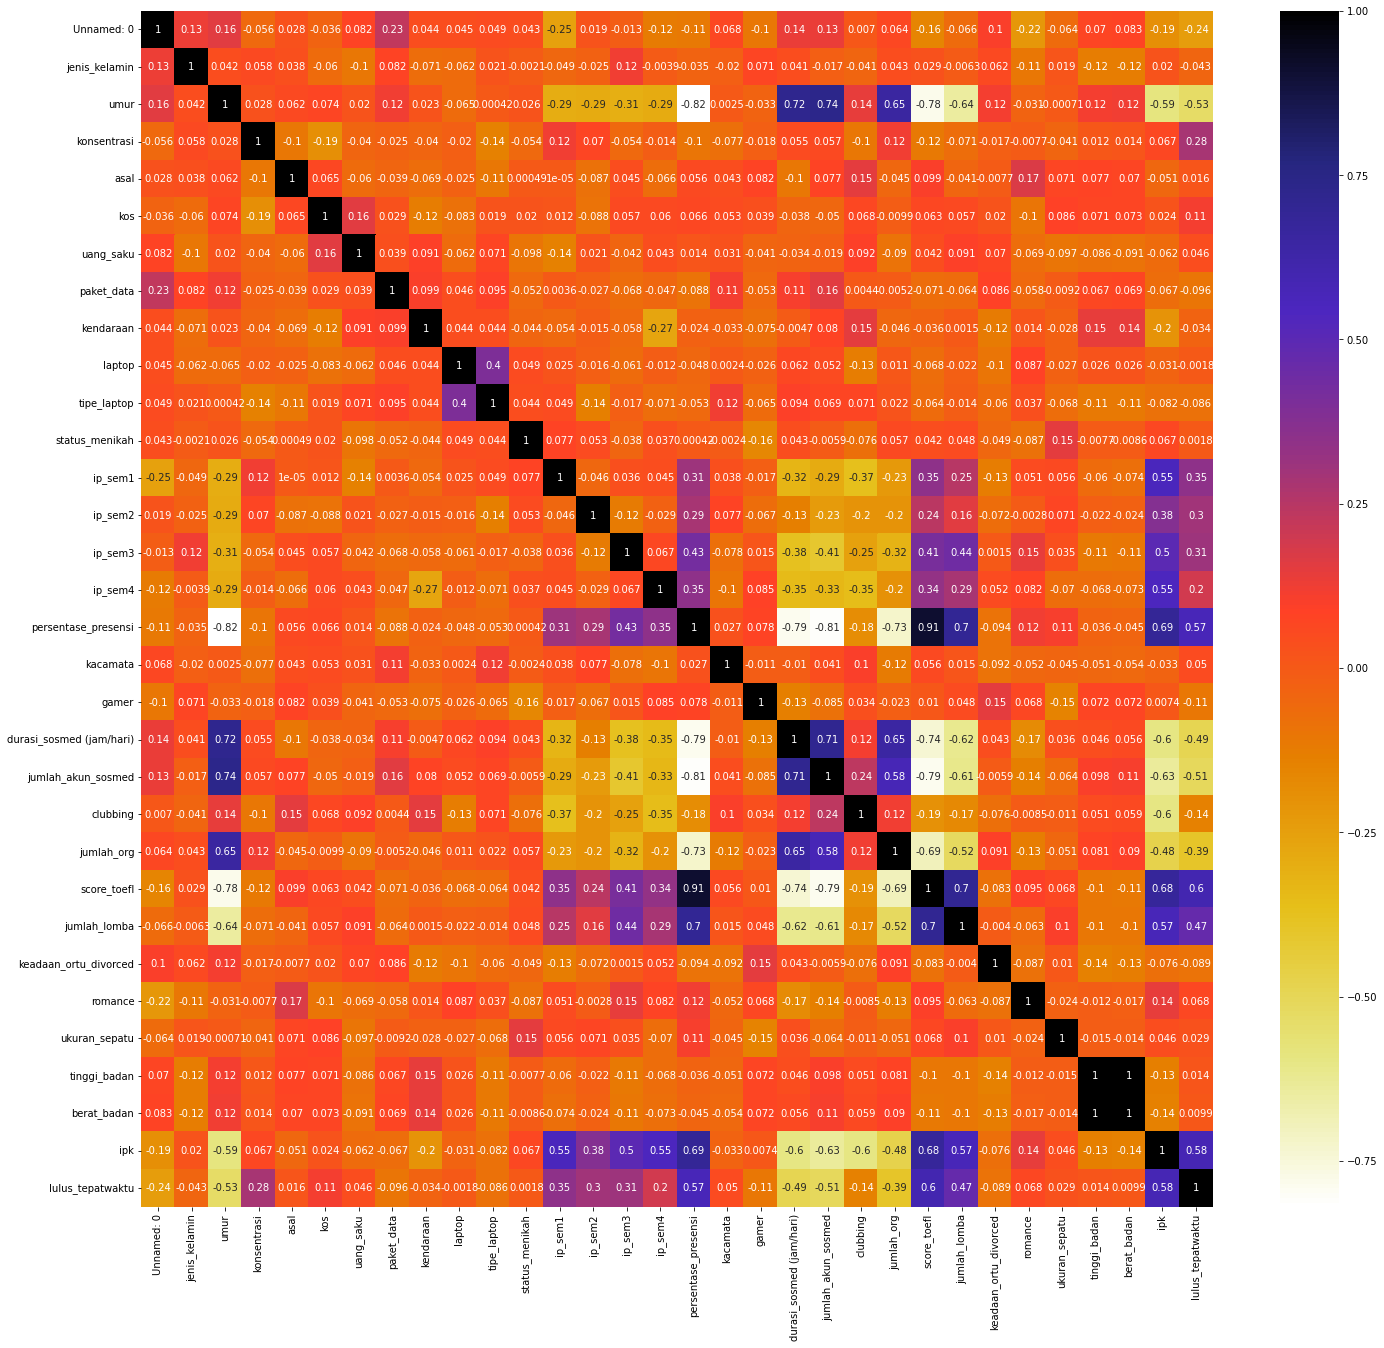

In [ ]:
cor = df.corr()
plt.figure(figsize=(24,22))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()  

In [ ]:
#Correlation with output variable (lulus tepat waktu)
cor_target = abs(cor['lulus_tepatwaktu'])
# get correlation value higher or equal with 5
relevant_features = cor_target[cor_target>=0.5]
relevant_features

umur                   0.534956
persentase_presensi    0.568904
jumlah_akun_sosmed     0.509860
score_toefl            0.595081
ipk                    0.582700
lulus_tepatwaktu       1.000000
Name: lulus_tepatwaktu, dtype: float64

In [ ]:
# remove unused column
df.drop(df.columns.difference(['umur','persentase_presensi','jumlah_akun_sosmed','score_toefl','ipk','lulus_tepatwaktu']), 1, inplace=True)

df.head()

<ipython-input-7-dc90e511ec81>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(df.columns.difference(['umur','persentase_presensi','jumlah_akun_sosmed','score_toefl','ipk','lulus_tepatwaktu']), 1, inplace=True)


,umur,persentase_presensi,jumlah_akun_sosmed,score_toefl,ipk,lulus_tepatwaktu
0,20,97,1,119,3.86,1
1,19,90,1,117,3.96,1
2,22,85,2,90,3.68,0
3,20,86,1,97,3.69,0
4,21,91,1,114,3.68,0


# **CLASSIFICATION GAUSSIAN NAIVE BAYES**

In [ ]:
# variabel independent (umur, presentase_presensi, jumlah_akun_sosmed, score_toefl, ipk)
X = df.iloc[:, [0, 1, 2, 3, 4]].values
# variabel dependent (lulus tepat waktu)
y = df.iloc[:, -1].values

In [ ]:
#  see 5 data after iloc 
print(f"X: \n {X[:5]}")
print(f"Y: \n {y[:5]}")

X: 
 [[ 20.    97.     1.   119.     3.86]
 [ 19.    90.     1.   117.     3.96]
 [ 22.    85.     2.    90.     3.68]
 [ 20.    86.     1.    97.     3.69]
 [ 21.    91.     1.   114.     3.68]]
Y: 
 [1 1 0 0 0]


In [ ]:
# import classification library
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
# split independent and dependent data into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 21)

In [ ]:
# using gaussian naive bayes classification method
classifier_model_binary = GaussianNB()
# klasifikasi pada data training
classifier_model_binary.fit(X_train, y_train)

GaussianNB()

In [ ]:
# klasifikasi pada data testing
y_pred = classifier_model_binary.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1])

In [ ]:
# mendapatkan nilai probabilitas dari data testing 
classifier_model_binary.predict_proba(X_test)

array([[1.34439418e-03, 9.98655606e-01],
       [1.00000000e+00, 4.54058518e-47],
       [4.55750461e-03, 9.95442495e-01],
       [1.00000000e+00, 4.79238817e-43],
       [1.00000000e+00, 1.05607552e-26],
       [1.00000000e+00, 2.65197379e-41],
       [1.00000000e+00, 5.29262392e-41],
       [1.00000000e+00, 3.44768185e-28],
       [1.00000000e+00, 1.84298787e-39],
       [1.00000000e+00, 3.77933401e-36],
       [1.00000000e+00, 1.02542691e-43],
       [1.00000000e+00, 8.53313019e-50],
       [1.00000000e+00, 1.02239647e-42],
       [4.62785089e-03, 9.95372149e-01],
       [1.00000000e+00, 4.04662685e-36],
       [1.00000000e+00, 6.80569990e-45],
       [1.00000000e+00, 1.41952385e-38],
       [1.00000000e+00, 2.70408843e-22],
       [1.00000000e+00, 2.56280940e-37],
       [1.00000000e+00, 8.81263460e-42],
       [1.00000000e+00, 1.21350292e-43],
       [1.00000000e+00, 1.27462181e-31],
       [1.00000000e+00, 4.23951192e-30],
       [1.00000000e+00, 5.92428777e-31],
       [4.441309

In [ ]:
# fungsi untuk memperediksi probabilitas dari data baru
def predict_one(umur,persentase_presensi,jumlah_akun_sosmed,score_toefl,ipk):
  array_input = [[umur,persentase_presensi,jumlah_akun_sosmed,score_toefl,ipk]]
  print("Probability : ", classifier_model_binary.predict_proba(array_input))

In [ ]:
# memperediksi probabilitas pada data
predict_one(20, 90, 1, 80, 3.5)

Probability :  [[0.85959443 0.14040557]]


In [ ]:
# fungsi untuk memperediksi class dari data baru
def predict_Class(umur,persentase_presensi,jumlah_akun_sosmed,score_toefl,ipk):
  array_input = [[umur,persentase_presensi,jumlah_akun_sosmed,score_toefl,ipk]]
  print("Class : ", classifier_model_binary.predict(array_input))

In [ ]:
# try to predict class
predict_Class(20, 90, 1, 80, 3.5)

Class :  [0]


In [ ]:
target_names = ["tidak tepat waktu","tepat waktu"]
print(classification_report(y_test, y_pred, zero_division=0,  target_names=target_names))

                   precision    recall  f1-score   support

tidak tepat waktu       1.00      0.90      0.95        41
      tepat waktu       0.50      1.00      0.67         4

         accuracy                           0.91        45
        macro avg       0.75      0.95      0.81        45
     weighted avg       0.96      0.91      0.92        45



dari hasil report classification di atas klasifikasi yang kita buat mendapatkan akurasi 90% pada saat memprediksi lulus tidak tepat waktu, dan mendapatkan akurasi 100% pada saat memperediksi lulus tepat waktu.

secara keseluruhan model klasifikasi yang telah di buat memiliki akurasi 91%

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


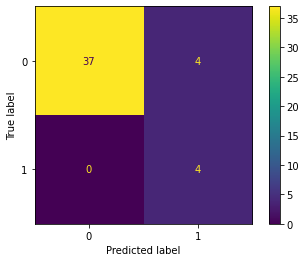

In [ ]:
plot_confusion_matrix(classifier_model_binary, X_test, y_test)  
plt.show()

dari grafik confusion_matrix di atas model yang kita buat memperediksi 4 data lulus tepat waktu dan memiliki kesalahan prediksi 0 karena akurasi saat memperediksi lulus tepat waktu adalah 100%

sedangkan untuk memperediksi tidak lulus tepat waktu terdapat 4 data salah prediksi karena akurasi nya 90%